
__Program__           - ipl_data_analysis.ipynb <br>
__Author__            - Aditi Kharche <br>
__Program Date__      - March 2 2023 <br>
__Business Problem__  - <br>
> Uber management wants to know how to effectively manage their rental fleet on ground. <br>
In order to do so, they would like to understand the trend of ride utilization by months, day of month, weekday of week and hour of the day across dispatch base location and also understand the usage by location on the map. <br>

__Change log__        - Initial Version created. Ready for review - March 10 2022


## LIBRARY IMPORT SECTION <br> 

In [13]:
#Import Libraries required for data analysis and data visualization 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import calendar
import sqlite3
from subprocess import check_output

## DATA LOADING SECTION <br>


In [15]:
#Defining Connection string

conn = sqlite3.connect('/Users/sachinkharche/Documents/da_using_sql/data_using_sql/data/database.sqlite')
exectue = conn.cursor()

In [25]:
#test query to test connection and ability to connect to database

pd.read_sql_query('SELECT * FROM Ball_by_Ball limit 10', conn)

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler
0,335987,1,1,1,1,2,1,1,2,14
1,335987,1,1,2,2,1,1,6,7,106
2,335987,1,2,1,1,2,2,2,1,14
3,335987,1,2,2,2,1,2,7,6,106
4,335987,1,3,1,1,2,2,2,1,14
5,335987,1,3,2,2,1,2,7,6,106
6,335987,1,4,1,1,2,2,2,1,14
7,335987,1,4,2,2,1,2,7,6,106
8,335987,1,5,1,1,2,2,2,1,14
9,335987,1,5,2,2,1,1,6,7,106


In [23]:
#Counting number of rows in table using panda

df_var1.shape

(10, 10)

In [21]:
#Counting number of rows in table using SQL

pd.read_sql_query('SELECT count(*) FROM Ball_by_Ball', conn)

,count(*)
0,136590


## DATA TRANSFORMATION SECTION <br>


In [30]:
conn.execute(
    """DROP TABLE LOCATION"""
       )

In [31]:
conn.execute(
    """CREATE TABLE LOCATION 
AS
SELECT CT.country_id, CT.Country_Name, 
C.city_id, C.City_Name, 
V.Venue_Id, V.Venue_Name
FROM 
Country CT 
LEFT JOIN City C
ON (CT.Country_Id = C.Country_id)
LEFT JOIN Venue V 
ON (C.City_Id = V.City_Id)
WHERE V.city_id IS NOT NULL"""
       )

In [43]:
pd.read_sql_query('SELECT * FROM LOCATION LIMIT 5', conn)

,Country_Id,Country_Name,City_Id,City_Name,Venue_Id,Venue_Name
0,1,India,17,Ahmedabad,19,"Sardar Patel Stadium, Motera"
1,1,India,1,Bangalore,1,M Chinnaswamy Stadium
2,1,India,2,Chandigarh,33,"Punjab Cricket Association IS Bindra Stadium, ..."
3,1,India,2,Chandigarh,2,"Punjab Cricket Association Stadium, Mohali"
4,1,India,8,Chennai,8,"MA Chidambaram Stadium, Chepauk"


In [41]:
df_location = pd.read_sql_query('SELECT * FROM LOCATION', conn)

In [42]:
df_location.head(5)

,Country_Id,Country_Name,City_Id,City_Name,Venue_Id,Venue_Name
0,1,India,17,Ahmedabad,19,"Sardar Patel Stadium, Motera"
1,1,India,1,Bangalore,1,M Chinnaswamy Stadium
2,1,India,2,Chandigarh,33,"Punjab Cricket Association IS Bindra Stadium, ..."
3,1,India,2,Chandigarh,2,"Punjab Cricket Association Stadium, Mohali"
4,1,India,8,Chennai,8,"MA Chidambaram Stadium, Chepauk"


In [34]:
conn.execute(
    """DROP TABLE SEASONAL_METRICS_BY_LOCATION"""
       )

OperationalError: no such table: SEASONAL_METRICS_BY_LOCATION

In [35]:
conn.execute("""
CREATE TABLE SEASONAL_METRICS_BY_LOCATION
AS
select 
S.season_year,
L.country_name,
L.city_name,
L.Venue_Name,
M.Match_Id,
O.Outcome_type,
T.team_name AS TEAM1_NAME,
TW.team_name AS TEAM2_NAME,
TP.Team_Name AS TOSS_WINNER_TEAM_NAME,
TL.Team_Name AS MATCH_WINNER_TEAM_NAME,
TS.toss_name,
w.win_type
FROM Match M
LEFT JOIN Season S 
ON (M.season_id = S.Season_Id)
LEFT JOIN LOCATION L
ON (M.venue_id = L.Venue_Id)
LEFT JOIN Outcome O
ON (M.outcome_TYPE = O.Outcome_Id)
LEFT JOIN TEAM T
ON (M.Team_1 = T.Team_Id)
LEFT JOIN TEAM TW
ON (M.Team_2 = TW.Team_Id)
LEFT JOIN TEAM TP
ON (M.toss_winner = TP.Team_Id)
LEFT JOIN TEAM TL
ON (M.match_winner = TL.Team_Id)
LEFT JOIN Win_By W
ON (M.win_TYPE = W.Win_Id)
LEFT JOIN Toss_Decision TS
ON (M.toss_decide = TS.Toss_Id)""")

In [37]:
pd.read_sql_query('SELECT * FROM SEASONAL_METRICS_BY_LOCATION LIMIT 5', conn)

,Season_Year,Country_Name,City_Name,Venue_Name,Match_Id,Outcome_Type,TEAM1_NAME,TEAM2_NAME,TOSS_WINNER_TEAM_NAME,MATCH_WINNER_TEAM_NAME,Toss_Name,Win_Type
0,2008,India,Bangalore,M Chinnaswamy Stadium,335987,Result,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs
1,2008,India,Chandigarh,"Punjab Cricket Association Stadium, Mohali",335988,Result,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,runs
2,2008,India,Delhi,Feroz Shah Kotla,335989,Result,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,bat,wickets
3,2008,India,Mumbai,Wankhede Stadium,335990,Result,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,wickets
4,2008,India,Kolkata,Eden Gardens,335991,Result,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders,bat,wickets


In [38]:
df_flat_table = pd.read_sql_query('SELECT * FROM SEASONAL_METRICS_BY_LOCATION', conn)

In [39]:
df_flat_table.head(5)

,Season_Year,Country_Name,City_Name,Venue_Name,Match_Id,Outcome_Type,TEAM1_NAME,TEAM2_NAME,TOSS_WINNER_TEAM_NAME,MATCH_WINNER_TEAM_NAME,Toss_Name,Win_Type
0,2008,India,Bangalore,M Chinnaswamy Stadium,335987,Result,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs
1,2008,India,Chandigarh,"Punjab Cricket Association Stadium, Mohali",335988,Result,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,runs
2,2008,India,Delhi,Feroz Shah Kotla,335989,Result,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,bat,wickets
3,2008,India,Mumbai,Wankhede Stadium,335990,Result,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,wickets
4,2008,India,Kolkata,Eden Gardens,335991,Result,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders,bat,wickets


In [44]:
df_agg_qry1 = pd.read_sql_query("""SELECT 
S.Season_Year, COUNT(match_id) AS NUMBER_OF_MATCHES, COUNT(DISTINCT team1_name)  NUMBER_OF_TEAMS
FROM SEASONAL_METRICS_BY_LOCATION S
GROUP BY S.Season_Year""", conn)




In [45]:
df_agg_qry1.head(5)

,Season_Year,NUMBER_OF_MATCHES,NUMBER_OF_TEAMS
0,2008,58,8
1,2009,57,7
2,2010,60,8
3,2011,73,10
4,2012,74,9


<AxesSubplot:xlabel='Season_Year', ylabel='NUMBER_OF_MATCHES'>

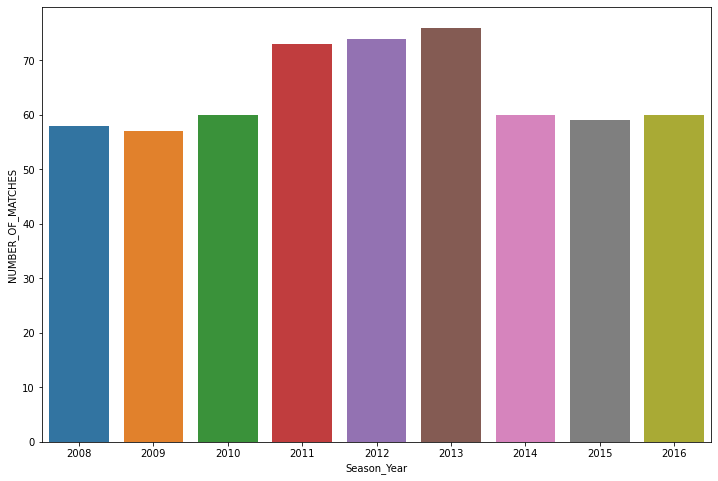

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x='Season_Year',y='NUMBER_OF_MATCHES' ,data=df_agg_qry1)

In [51]:
df_agg_qry2 = pd.read_sql_query("""SELECT 
S.Season_Year, s.Venue_Name, COUNT(match_id) AS NUMBER_OF_MATCHES, COUNT(DISTINCT team1_name)  NUMBER_OF_TEAMS
FROM SEASONAL_METRICS_BY_LOCATION S
GROUP BY S.Season_Year, s.Venue_Name""", conn)



In [52]:
df_agg_qry2.head(5)

,Season_Year,Venue_Name,NUMBER_OF_MATCHES,NUMBER_OF_TEAMS
0,2008,Dr DY Patil Sports Academy,4,2
1,2008,Eden Gardens,7,1
2,2008,Feroz Shah Kotla,6,1
3,2008,M Chinnaswamy Stadium,7,1
4,2008,"MA Chidambaram Stadium, Chepauk",7,1


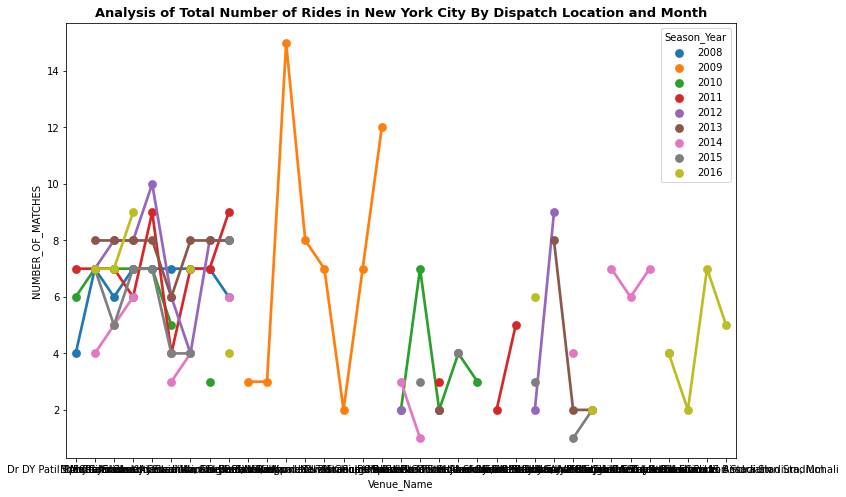